<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lalit        Geographic Region  Platform  Marketing Channel  Visits  \
0                      0         0                  0    3011   
1                      0         0                  3  119684   
2                      0         0                  4   25612   
3                      0         0                  5    3115   
4                      0         0                  6    5657   
...                  ...       ...                ...     ...   
87851                  3         1                  7   36235   
87852                  3         1                  8   18389   
87853                  3         1                  9     501   
87854                  3         1                 10    9890   
87855                  3         1                  1    7077   

       Qualified Shoppers  Bounced Visits  Gross Orders  Net Orders  
0                    1878             811          1139         957  
1                   82504           26541         12489       10369  
2  

<ipython-input-5-86177291fa7c>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


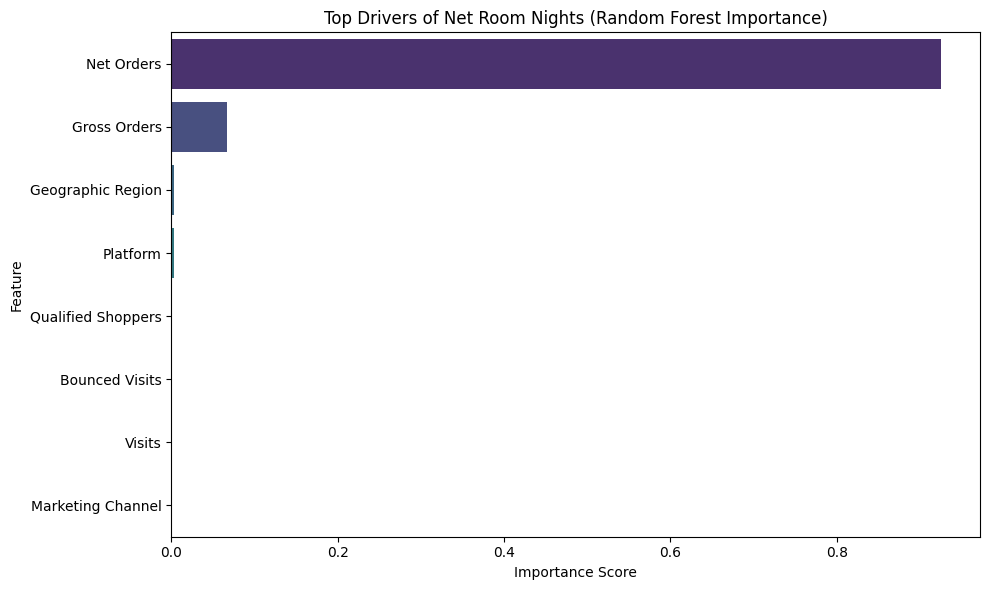

Top Marketing Channels by Avg Net Room Nights:
 Marketing Channel
Channel 2     11436.160519
Channel 1      1794.204463
Channel 3      1791.719945
Channel 7      1408.797473
Channel 6      1167.563069
Channel 5       838.860997
Channel 8       674.704007
Channel 9       660.558288
Channel 4       114.328438
Channel 10       63.757172
Channel 11       -0.500000
Name: Net Room Nights, dtype: float64

Top Platforms by Avg Net Room Nights:
 Platform
Desktop    3173.151179
Mobile      816.252846
Name: Net Room Nights, dtype: float64

Top Geographic Regions by Avg Net Room Nights:
 Geographic Region
Geo Region 1    4148.204699
Geo Region 2    2215.727144
Geo Region 3    1210.908077
Geo Region 4     403.968130
Name: Net Room Nights, dtype: float64


<ipython-input-5-86177291fa7c>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_avg.values, y=channel_avg.index, palette="crest")


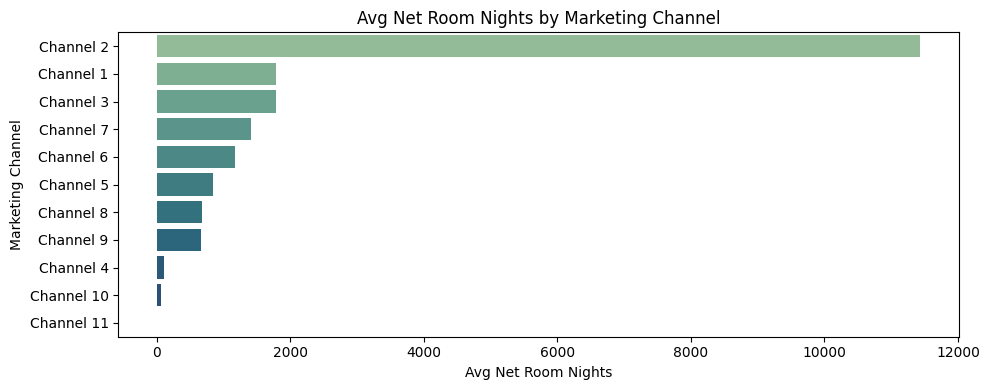

<ipython-input-5-86177291fa7c>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_avg.values, y=platform_avg.index, palette="muted")


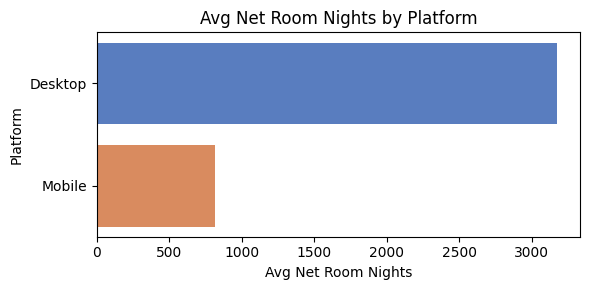

<ipython-input-5-86177291fa7c>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette="flare")


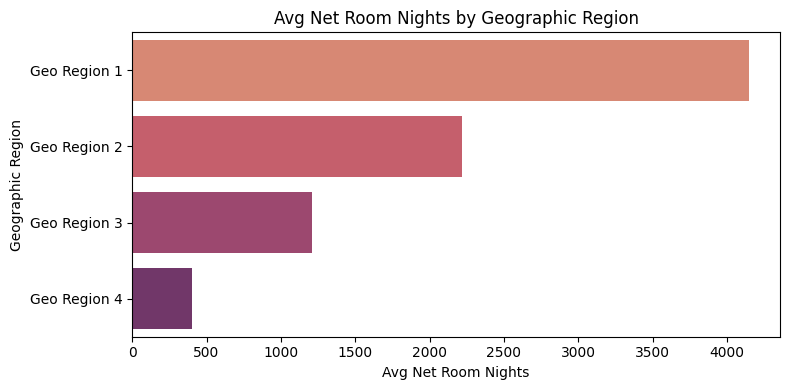

In [5]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# Step 1: Encode categorical variables
df_encoded = df.copy()
for col in ['Geographic Region', 'Platform', 'Marketing Channel']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Step 2: Define X and y
X = df_encoded.drop(columns=["Net Room Nights", "Date"])  # Features
print("Lalit",X)
y = df_encoded["Net Room Nights"]  # Target

# Step 3: Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 4: Feature Importance
importances = model.feature_importances_
features = X.columns

# Create DataFrame of importances
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(importance_df)
# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Top Drivers of Net Room Nights (Random Forest Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Top Marketing Channels
channel_avg = df.groupby("Marketing Channel")["Net Room Nights"].mean().sort_values(ascending=False)
print("Top Marketing Channels by Avg Net Room Nights:\n", channel_avg)

# Top Platforms
platform_avg = df.groupby("Platform")["Net Room Nights"].mean().sort_values(ascending=False)
print("\nTop Platforms by Avg Net Room Nights:\n", platform_avg)

# Top Regions
region_avg = df.groupby("Geographic Region")["Net Room Nights"].mean().sort_values(ascending=False)
print("\nTop Geographic Regions by Avg Net Room Nights:\n", region_avg)

# Plot Top Marketing Channels
plt.figure(figsize=(10, 4))
sns.barplot(x=channel_avg.values, y=channel_avg.index, palette="crest")
plt.title("Avg Net Room Nights by Marketing Channel")
plt.xlabel("Avg Net Room Nights")
plt.tight_layout()
plt.show()

# Plot Top Platforms
plt.figure(figsize=(6, 3))
sns.barplot(x=platform_avg.values, y=platform_avg.index, palette="muted")
plt.title("Avg Net Room Nights by Platform")
plt.xlabel("Avg Net Room Nights")
plt.tight_layout()
plt.show()

# Plot Top Regions
plt.figure(figsize=(8, 4))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="flare")
plt.title("Avg Net Room Nights by Geographic Region")
plt.xlabel("Avg Net Room Nights")
plt.tight_layout()
plt.show()

